In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# Any results you write to the current directory are saved as output.

In [0]:
#matplotlib este folosit pentru a realiza grafice
import matplotlib.pyplot as plt
plt.style.use("ggplot")


In [5]:
from google.colab import files
uploaded = files.upload()


Saving pima-indians-diabetes.csv to pima-indians-diabetes (1).csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['pima-indians-diabetes.csv']))

In [7]:
df.values

array([[1.00e+00, 8.50e+01, 6.60e+01, ..., 3.51e-01, 3.10e+01, 0.00e+00],
       [8.00e+00, 1.83e+02, 6.40e+01, ..., 6.72e-01, 3.20e+01, 1.00e+00],
       [1.00e+00, 8.90e+01, 6.60e+01, ..., 1.67e-01, 2.10e+01, 0.00e+00],
       ...,
       [5.00e+00, 1.21e+02, 7.20e+01, ..., 2.45e-01, 3.00e+01, 0.00e+00],
       [1.00e+00, 1.26e+02, 6.00e+01, ..., 3.49e-01, 4.70e+01, 1.00e+00],
       [1.00e+00, 9.30e+01, 7.00e+01, ..., 3.15e-01, 2.30e+01, 0.00e+00]])

In [6]:
!pip uninstall pandas-profiling

Uninstalling pandas-profiling-1.4.1:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/pandas_profiling-1.4.1.dist-info/*
    /usr/local/lib/python3.6/dist-packages/pandas_profiling/*
Proceed (y/n)? y
  Successfully uninstalled pandas-profiling-1.4.1


In [7]:
!pip install pandas-profiling==2.7.1

     |████████████████████████████████| 256kB 8.1MB/s 
     |████████████████████████████████| 614kB 15.5MB/s 
     |████████████████████████████████| 61kB 8.7MB/s 
     |████████████████████████████████| 71kB 10.1MB/s 
     |████████████████████████████████| 3.1MB 33.7MB/s 
     |████████████████████████████████| 296kB 50.2MB/s 
  Created wheel for confuse: filename=confuse-1.1.0-cp36-none-any.whl size=17574 sha256=3006f6443c9cd19524337fabb21332c774d23e61ad85a157f4cd80f7afe89460
  Stored in directory: /root/.cache/pip/wheels/f6/8b/23/41a1b516f6d8d4cc81f5bdb55394a47cdbe9659c53668d3c9e
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=d713b6d903e54949b08e0a45acffd4b8577a9928fa7b030c4b7ab9a378715205
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291990 sha256=fabaa83782a24fd9b89b54c2861b943936736373279c2305300

In [0]:
from pandas_profiling import ProfileReport

In [0]:
#Pentru seturi de date mari este indicat să folosim versiunea minimală a librăriei
prof=ProfileReport(df,minimal=True)

In [10]:
prof

In [0]:
X = df.iloc[:,:-1]
y = df[df.columns[-1]]
y = y.astype(np.int64)


In [0]:
#folosim o functie din sklearn ce creaza seturi de date pentru antrenare si validare
from sklearn.model_selection import train_test_split

In [0]:

#primim ca output seturile de date corespunzatoare.
#Test size ne spune cat de mare procentual sa avem setul de validare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [14]:
#Verificam distributia etichetelor de 0 si 1.
#Suma etichetelor ne da numarul de intrari cu 1.
#Ideal ar trebui sa avem o distributie echilibrata intre cele 2 valori
sum(y_train), len(y_train)

(215, 613)

In [15]:
sum(y_test), len(y_test)

(52, 154)

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
X_train

,6,148,72,35,0,33.6,0.627,50
235,7,181,84,21,192,35.9,0.586,51
47,7,103,66,32,0,39.1,0.344,31
334,0,165,76,43,255,47.9,0.259,26
31,3,88,58,11,54,24.8,0.267,22
656,1,120,80,48,200,38.9,1.162,41
...,...,...,...,...,...,...,...,...
147,5,147,78,0,0,33.7,0.218,65
457,10,148,84,48,237,37.6,1.001,51
434,0,141,0,0,0,42.4,0.205,29
268,2,146,0,0,0,27.5,0.240,28


In [18]:
y_train

235    1
47     1
334    0
31     0
656    0
      ..
147    0
457    1
434    1
268    1
660    1
Name: 1, Length: 613, dtype: int64

In [0]:
# Functia va translata fiecare feature in parte in intervalul (-1,1)
# Funcția practic relizează următoarele
# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min


sc = MinMaxScaler((-1, 1))

In [0]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
X_test

array([[-0.88235294,  0.07537688,  0.18032787, ..., -0.08196721,
        -0.33984896, -0.9       ],
       [-0.29411765,  0.25628141,  0.24590164, ...,  0.00745156,
        -0.96179476,  0.1       ],
       [ 0.52941176,  0.26633166,  0.47540984, ...,  0.29359165,
        -0.55131053, -0.3       ],
       ...,
       [-0.76470588, -0.11557789, -0.04918033, ..., -0.15350224,
        -0.38871613, -0.96666667],
       [-1.        ,  0.25628141,  0.57377049, ..., -0.32935917,
        -0.8365171 , -1.        ],
       [-0.41176471,  0.36683417,  0.37704918, ...,  0.04321908,
        -0.81519325, -0.53333333]])

In [0]:
from torch.utils.data import Dataset, DataLoader

In [0]:
import torch
from torch import nn, optim

In [0]:
#Dataset - o clasă din PyTorch foarte utilă gestionării seturilor de date
class Dataset(Dataset):
    """Pima Diabetes dataset."""
    # Initialize your data, download, etc.
    def __init__(self, x, y):
        #Citim setul de date
        self.len = len(x)

        self.x=torch.tensor(x).float()
        self.y=torch.tensor(y.values).long()

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.len

In [0]:
trainDataset=Dataset(X_train, y_train)

In [26]:
trainDataset[0]

(tensor([-0.1765,  0.8191,  0.3770, -0.3000, -0.4839,  0.0700, -0.5486,  0.0000]),
 tensor(1))

In [0]:
trainLoader=DataLoader(dataset=trainDataset,
                        batch_size=32,
                        shuffle=True,
                        num_workers=1)

In [0]:
validationDataset=Dataset(X_test, y_test)

In [0]:
validationLoader=DataLoader(dataset=validationDataset,
                        batch_size=32,
                        shuffle=True,
                        num_workers=1)

In [0]:
class PimaDiabetesNN(nn.Module):
    def __init__(self):
        super(PimaDiabetesNN, self).__init__()

        #Sequential oferă o alternativă mai estetică a codului
        #Rețeaua noastră are 2 neuroni pentru output. 
        #Unul va prezice probabilitatea pentru cazul afirmativ al bolii, iar celălalt va prezice probabilitatea cazului negativ al bolii.
        self.sequential= nn.Sequential(
            nn.Linear(8,100),
            nn.ReLU(),
            nn.Linear(100, 60),
            nn.ReLU(),
            nn.Linear(60, 2)
        )


    def forward(self, x):
        return self.sequential(x)

In [0]:

net = PimaDiabetesNN()

In [0]:
optimizer = optim.SGD(net.parameters(), lr=0.01)
# CrossEntropyLoss este folosit adeseori in problemele de clasificare
# Acesta este compus din functia SoftMax și NLLLoss
# Softmax - Mapează elementele din Tensor in intervalul [0,1] și face ca suma lor să fie 1. O functie foarte utilă atunci cand vrem sa calculam probabilitati dintr-un Tensor.
# NLLLoss - negative log likelihood loss, functie folosită adeseori in problemele de clasificare
criterion = nn.CrossEntropyLoss()
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, verbose=True)

In [0]:
#Colectăm loss-urile din antrenare pentru a le plota ulterior
train_losses = []

In [0]:
# Colectăm accuratetea pentru a o plota ulterior
accuracies=[]

In [0]:

from sklearn.metrics import accuracy_score

In [0]:
# Training loop
def train(epoch):
    # Setează câteva flaguri în rețeaua neurală. Specific activează Dropout-ul și BatchNormalization dacă este cazul.
    # În exemplul nostru are un rol pur demonstrativ, nefiind necesar.
    net.train()
    losses=[]
    for batch_idx, data in enumerate(trainLoader, 0):
      inputs, labels =data
      #Obținem predictii
      outputs = net(inputs)
      # Compute and print loss
      loss = criterion(outputs, labels)

      losses.append(loss.item())
      # Zero gradients, perform a backward pass, and update the weights.
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      print(f"[Train Epoch: {epoch}, Batch: {batch_idx+1}, Loss: {loss.item()}")
    mean_loss=sum(losses)/len(losses)
    scheduler.step(mean_loss)
    train_losses.append(mean_loss)
    print(f"[TRAIN] Epoch: {epoch} Loss:{mean_loss}")

In [0]:
# Colectăm loss-ul din validare pentru a o plota ulterior
test_losses=[]

In [0]:
def validation():
    #Pune pe off flagurile setate in model.train()
    #Din nou, în exemplul nostru e pur demonstrativ.
    net.eval()

    test_loss=[]
    correct = 0

    with torch.no_grad():
        for batch_idx, data in enumerate(validationLoader, 0):
          inputs, labels = data

          output=net(inputs)

          loss= criterion(output, labels)
          test_loss.append(loss.item())

          #Obținem predictiile pentru fiecare linie din setul de validare.
          #Practic ne returnează rezultatul cu cea mai mare probabilitate pentru fiecare intrare din setul de validare 
          pred = output.data.max(1, keepdim=True)[1]

          #Verificăm câte predicții sunt corecte și le însumăm numărul pentru a afla totalul de predicții corecte
          correct += pred.eq(labels.data.view_as(pred)).sum()
          current_correct=pred.eq(labels.data.view_as(pred)).sum()          
          print("============")
          print(f"[Validation set] Batch index: {batch_idx+1} Batch loss: {loss.item()}, Accuracy: {100. * current_correct/len(inputs)}%")
          print("============")
        mean_loss=sum(test_loss)/len(test_loss)
        test_losses.append(mean_loss)
        accuracy = 100. * correct/len(validationLoader.dataset)
        print(f"[Validation set] Loss: {mean_loss}, Accuracy: {accuracy}%")
          
        accuracies.append(accuracy)

In [39]:
#după fiecare epocă de train() verificăm rezultatele pe setul de validare
for epoch in range(100):
  train(epoch)
  validation()

[Train Epoch: 0, Batch: 1, Loss: 0.6720271110534668
[Train Epoch: 0, Batch: 2, Loss: 0.663419783115387
[Train Epoch: 0, Batch: 3, Loss: 0.6840497255325317
[Train Epoch: 0, Batch: 4, Loss: 0.6805021166801453
[Train Epoch: 0, Batch: 5, Loss: 0.6726692914962769
[Train Epoch: 0, Batch: 6, Loss: 0.6599814295768738
[Train Epoch: 0, Batch: 7, Loss: 0.6255436539649963
[Train Epoch: 0, Batch: 8, Loss: 0.6674341559410095
[Train Epoch: 0, Batch: 9, Loss: 0.6672976016998291
[Train Epoch: 0, Batch: 10, Loss: 0.6392255425453186
[Train Epoch: 0, Batch: 11, Loss: 0.6350736021995544
[Train Epoch: 0, Batch: 12, Loss: 0.6478100419044495
[Train Epoch: 0, Batch: 13, Loss: 0.6555259823799133
[Train Epoch: 0, Batch: 14, Loss: 0.6344718337059021
[Train Epoch: 0, Batch: 15, Loss: 0.6985256671905518
[Train Epoch: 0, Batch: 16, Loss: 0.6647273898124695
[Train Epoch: 0, Batch: 17, Loss: 0.7000792026519775
[Train Epoch: 0, Batch: 18, Loss: 0.6581814885139465
[Train Epoch: 0, Batch: 19, Loss: 0.706009566783905
[Tra

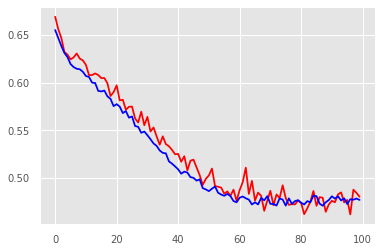

In [40]:
# Printăm comparativ cu roșu loss-ul de pe setul de validare și cu albastru loss-ul de pe setul de validare.
plt.plot(train_losses, "r-", test_losses, "b-")

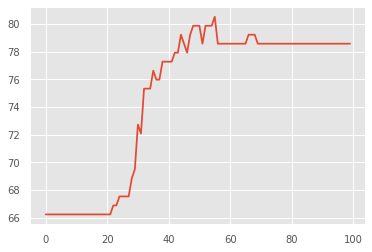

In [41]:
plt.plot(accuracies)

In [0]:
#Let's try and feed a single example in the neural network and see if it gets it right
def try_a_single_example_with_the_network(index_from_the_validation_set):
  with torch.no_grad():
    pred_test = net(validationDataset[index_from_the_validation_set][0].view(1, -1))
    _, preds_y = torch.max(pred_test, 1)
    return preds_y

In [0]:
index_of_test=30

In [44]:
print(f"Neural network response is: {try_a_single_example_with_the_network(index_of_test).item()}")
print(f"Actual response is: {validationDataset[index_of_test][1].view(-1).item()}")

Neural network response is: 0
Actual response is: 0
